<font size = 6>The Gradient of Mean Squared Error

***

## Libraries & Stuff

In [1]:
import torch

In [2]:
import matplotlib.pyplot as plt

***

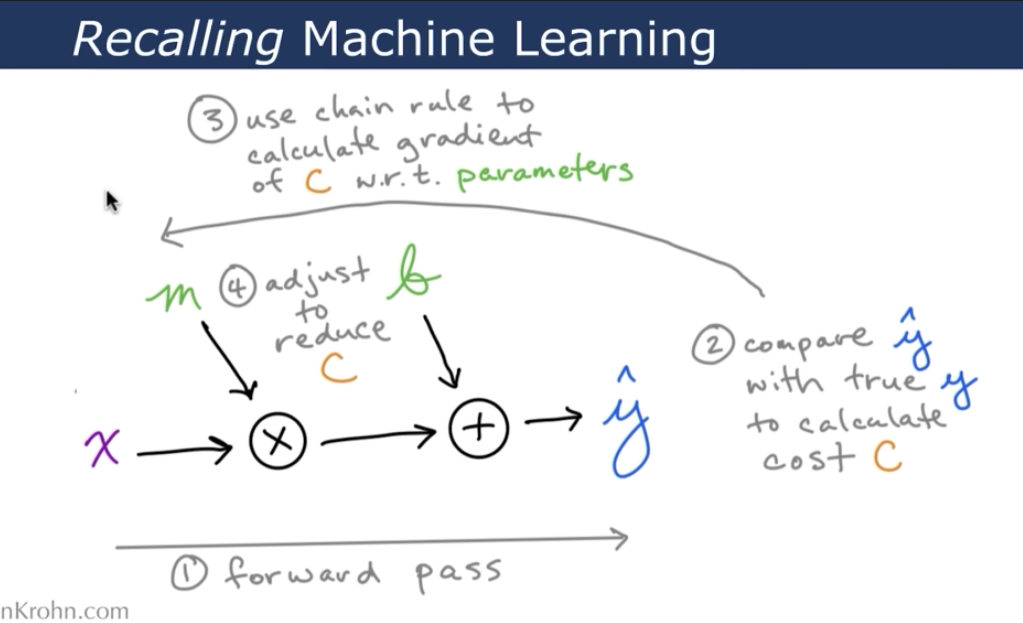

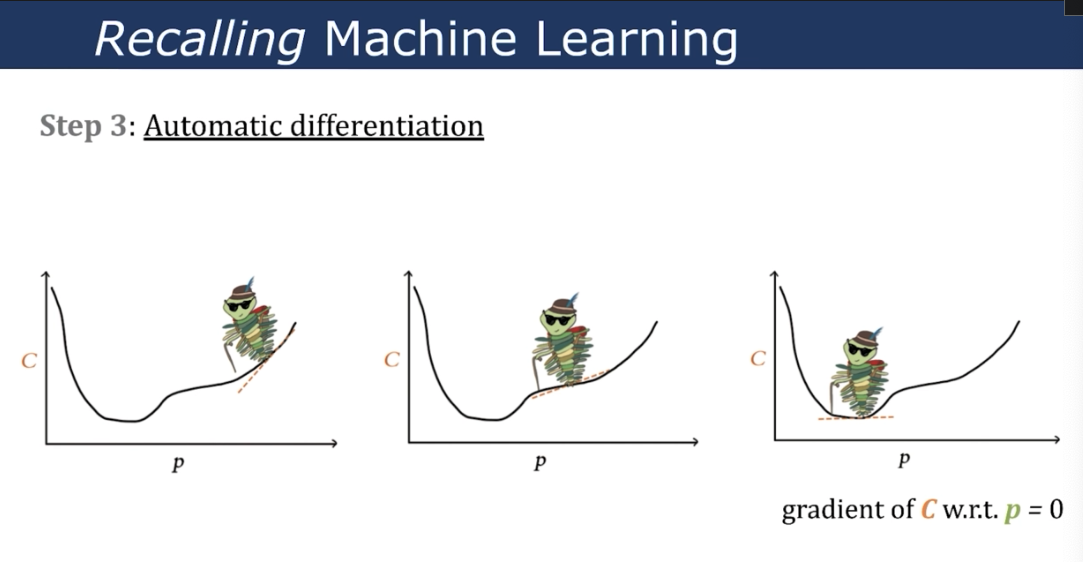

In [3]:
xs = torch.tensor([0,1,2,3,4,5,6,7.])

In [4]:
ys = torch.tensor([1.86, 1.31, .62, .33, .09, -.67, -1.23, -1.37])

***

slope of a line is y = mx + b

In [5]:
def regression(my_x, my_m, my_b):
    return my_m * my_x + my_b

initialize the values of m and b

In [6]:
m = torch.tensor([0.9]).requires_grad_()

In [7]:
b = torch.tensor([0.1]).requires_grad_()

***

In [8]:
i = 7
x = xs[i]
y = ys[i]

In [15]:
x

tensor(7.)

In [16]:
y

tensor(-1.3700)

***

# Step 1 -- Forward Pass

In [9]:
yhats = regression(xs, m, b)

In [10]:
yhats

tensor([0.1000, 1.0000, 1.9000, 2.8000, 3.7000, 4.6000, 5.5000, 6.4000],
       grad_fn=<AddBackward0>)

***

# Step 2 -- Calculate Cost C

### Used squared error (not MSE) in prior run

In the *Regression in PyTorch* notebook, we used mean-squared error, which averages quadratic cost over multiple data points. With a single data point, here we can use quadratic cost alone. It is defined by: $$ C = (\hat{y} - y)^2 $$

In [19]:
# def squared_error(my_yhat, my_y):
#     return(my_yhat - my_y)**2

In [20]:
# C = squared_error(yhat, y)

In [21]:
# C

tensor([60.3729], grad_fn=<PowBackward0>)

In [31]:
# cost of 60

### MSE

In [11]:
def mse(my_yhat, my_y):
    sigma = torch.sum((my_yhat - my_y)**2)
    return sigma/len(my_y)

In [13]:
C = mse(yhats, ys)

# all 8 values are passed here

In [14]:
C

tensor(19.6755, grad_fn=<DivBackward0>)

***

# Step 3 -- Calculate Gradient of C wrt parameters

In [15]:
C.backward()

# this is autodiff

In [16]:
m.grad

tensor([36.3050])

In [17]:
b.grad

tensor([6.2650])

***

<font size = 8,  color = red> Chapter Starts Here

## Step 3 -- Calculate Gradient Manually

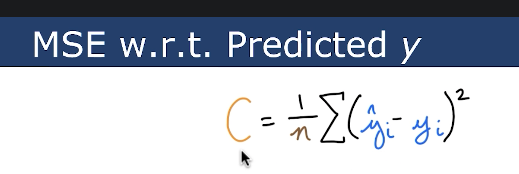

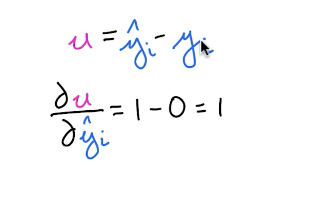

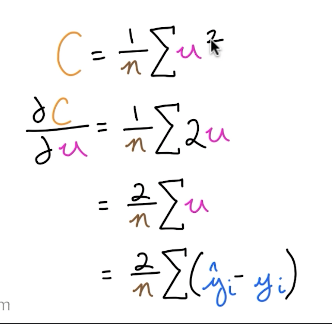

***

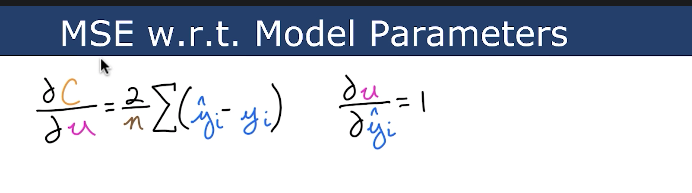

#### Recall the prior values of dyhat/dm and dyhat/b

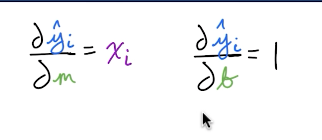

In [1]:
# not computing these two values in teh interest of time

***

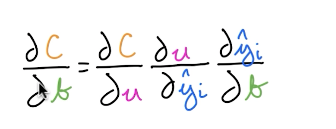

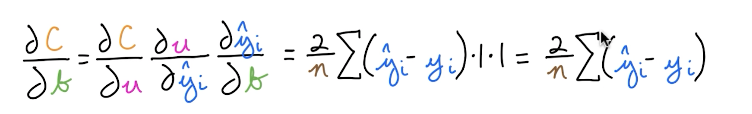

***

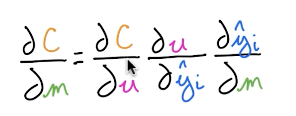

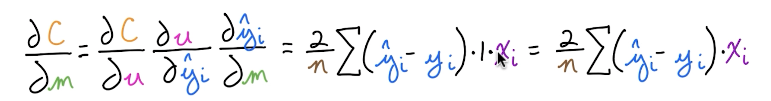

***

# Comparison of partial derivatives (auto v/s manual)

### Autodiff

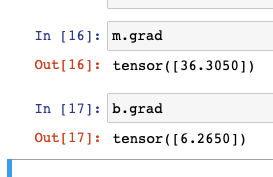

### Manual - dC/dm

$$ \frac{\partial C}{\partial m} = \frac{2}{n} \sum (\hat{y}_i - y_i) \cdot x_i $$

In [18]:
2*1/len(ys)*torch.sum((yhats - ys)*xs)

tensor(36.3050, grad_fn=<MulBackward0>)

### Manual dC/db

$$ \frac{\partial C}{\partial b} = \frac{2}{n} \sum (\hat{y}_i - y_i) $$

In [19]:
2*1/len(ys)*torch.sum(yhats - ys)

tensor(6.2650, grad_fn=<MulBackward0>)

***

### Calculate dC

We don't need to explicitly create a standalone $\nabla C$ object (Greek inverted delta is called *nabla* for "harp" but w.r.t. gradient is *del* as in "del C") for the remainder of the code in this notebook to run, but let's create it for fun now anyway and we'll make use of it in a later, related notebook: 

In [20]:
gradient = torch.tensor([[b.grad.item(), m.grad.item()]]).T
gradient

tensor([[ 6.2650],
        [36.3050]])

***

# <font size = 8, color = red> Gradient Descent in Action

In [21]:
def labeled_regression_plot(my_x, my_y, my_m, my_b, my_C, include_grad=True):
    
    title = 'Cost = {}'.format('%.3g' % my_C.item())
    if include_grad:
        xlabel = 'm = {}, m grad = {}'.format('%.3g' % my_m.item(), '%.3g' % my_m.grad.item())
        ylabel = 'b = {}, b grad = {}'.format('%.3g' % my_b.item(), '%.3g' % my_b.grad.item())
    else:
        xlabel = 'm = {}'.format('%.3g' % my_m.item())        
        ylabel = 'b = {}'.format('%.3g' % my_b.item())
    
    fig, ax = plt.subplots()
    
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    ax.scatter(my_x, my_y, zorder=3)
    
    x_min, x_max = ax.get_xlim()
    y_min = regression(x_min, my_m, my_b).detach().item()
    y_max = regression(x_max, my_m, my_b).detach().item()

    ax.set_xlim([x_min, x_max])
    _ = ax.plot([x_min, x_max], [y_min, y_max], c='C01')

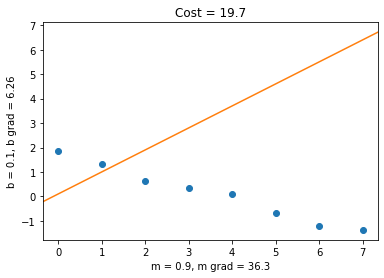

In [22]:
labeled_regression_plot(xs, ys, m, b, C)

In [23]:
# this assumes a slop of .9 and y intercept of 0.1

In [24]:
# cost = 19.7

## Descend the Gradient

$\frac{\partial C}{\partial m} = 36.3$ indicates that an increase in $m$ corresponds to a large increase in $C$. 

Meanwhile, $\frac{\partial C}{\partial b} = 6.26$ indicates that an increase in $b$ also corresponds to an increase in $C$, though much less so than $m$.

In the first round of training, the lowest hanging fruit with respect to reducing cost $C$ is therefore to decrease the slope of the regression line, $m$. There will also be a relatively small decrease in the $y$-intercept of the line, $b$. 

In [26]:
# we start with decreasing the slope (m) of the regression line

### <font size = 6, color = red> We are still going to calculate gradient descent automatically with Pytorch

### <font size = 6, color = red> However, in Chapter 8 (Optimization), we will do this manually

In [28]:
optimizer = torch.optim.SGD([m,b], lr = 0.01)

# this will adjust both m and b

# thought the focus will be on m first

In [29]:
optimizer.step()

In [31]:
C = mse(regression(xs, m, b), ys)

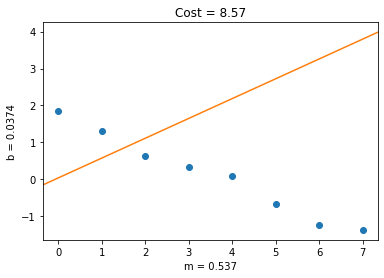

In [33]:
labeled_regression_plot(xs, ys, m, b, C, include_grad=False)

# Gradient of C hasn't been recalculated

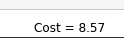

In [34]:
# cost has reduced

# so has slope m and y intercept

***

### Rinse and Repeat

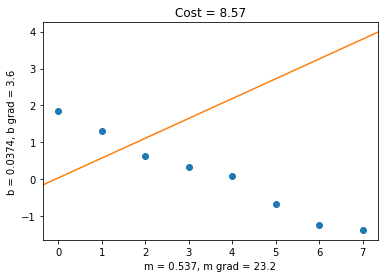

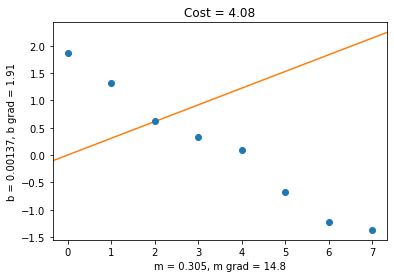

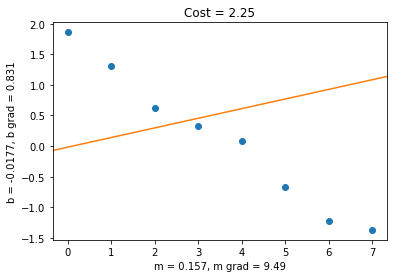

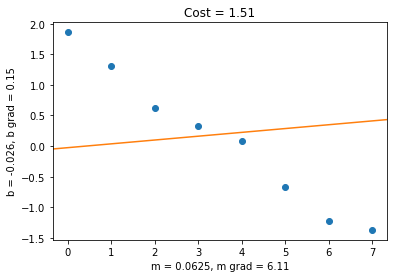

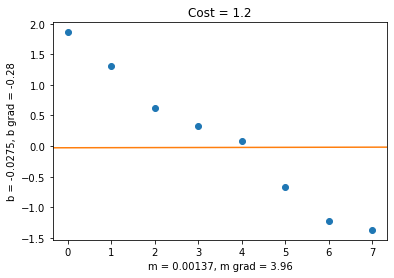

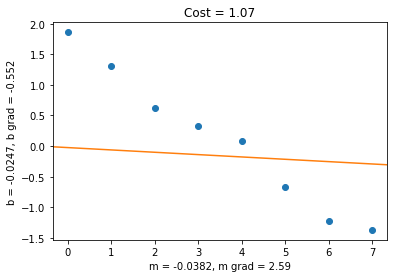

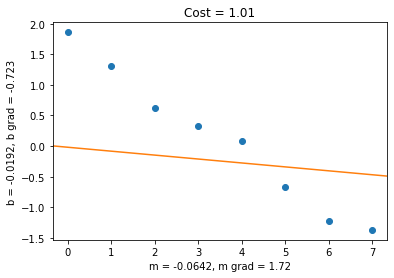

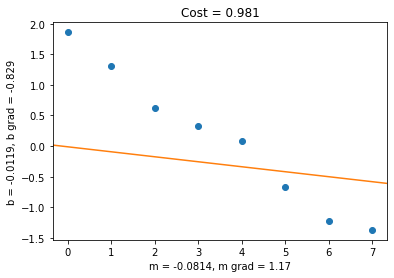

In [36]:
epochs = 8
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4

***

/var/folders/_5/mw87wr4s5p902pvj5xm4sqnw0000gn/T/ipykernel_60025/1958582589.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


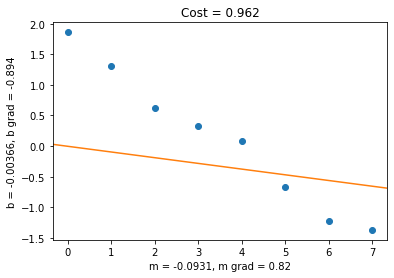

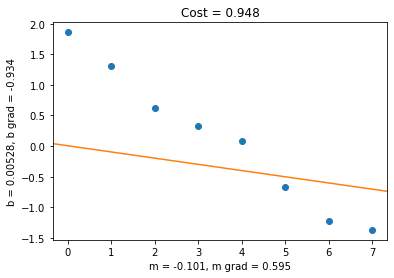

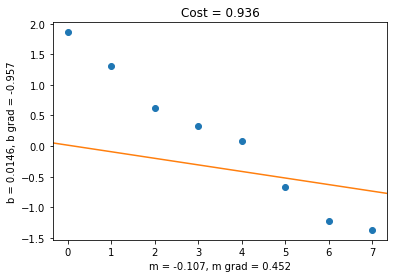

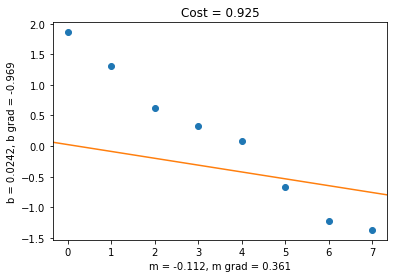

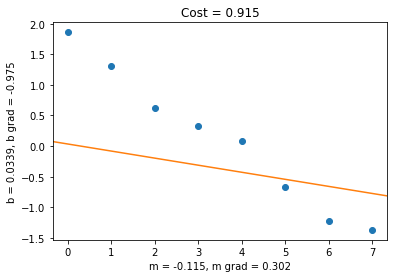

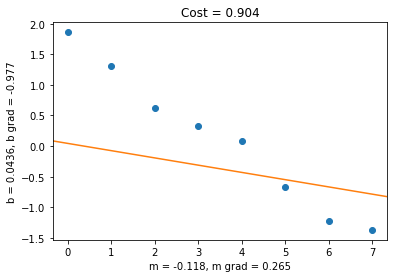

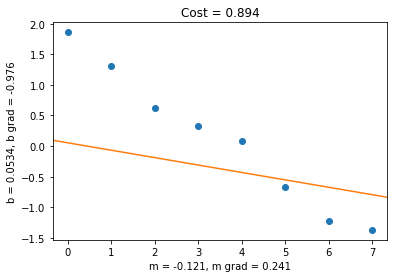

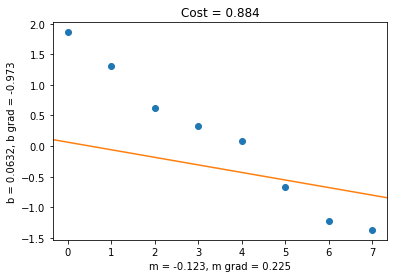

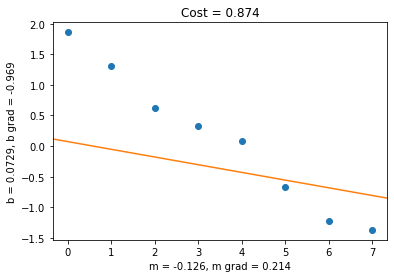

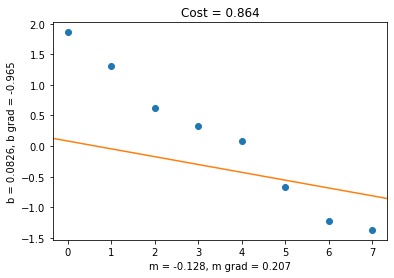

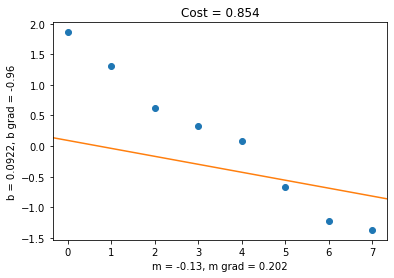

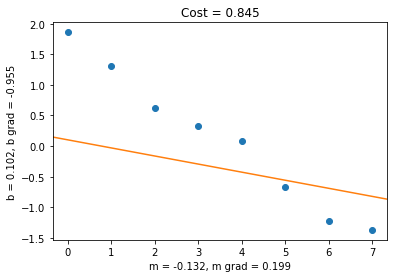

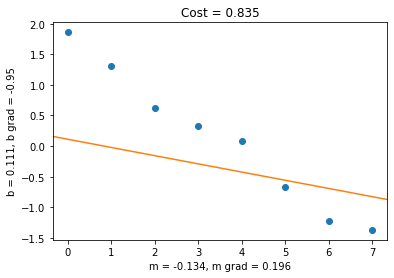

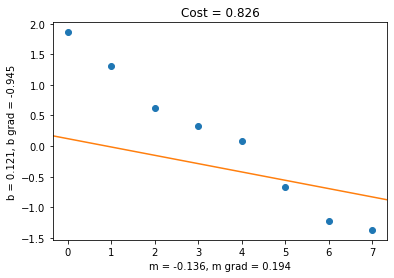

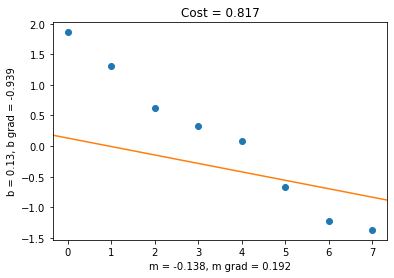

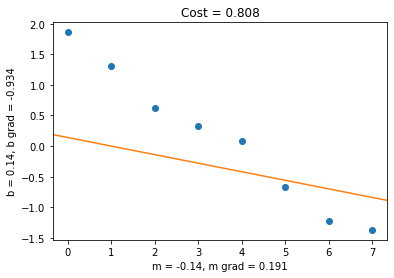

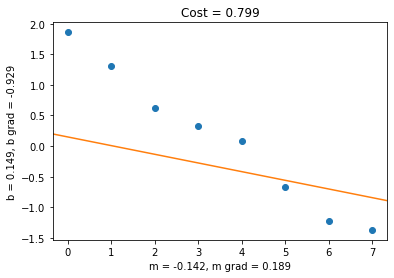

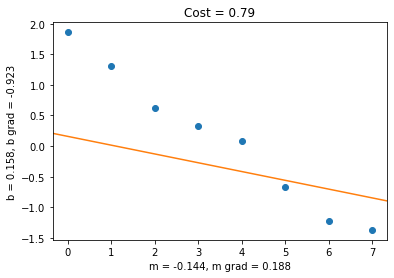

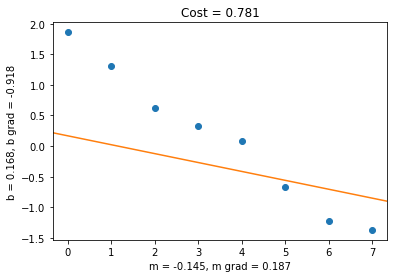

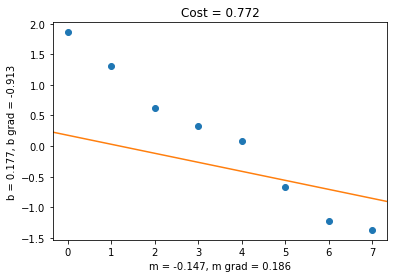

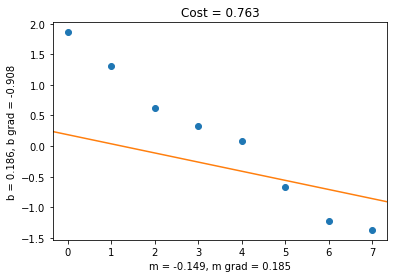

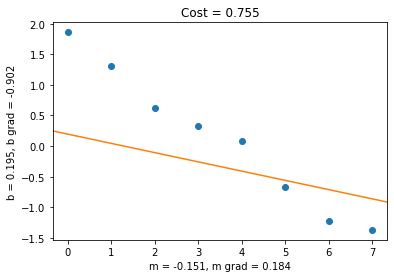

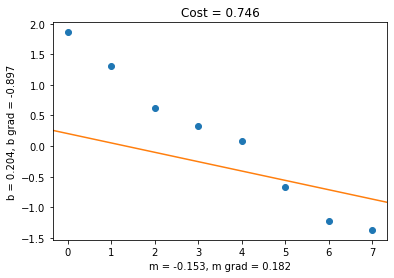

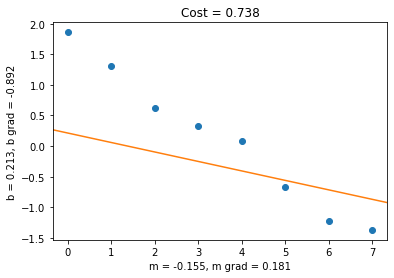

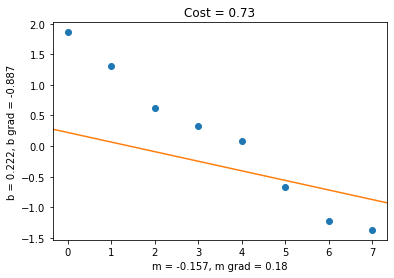

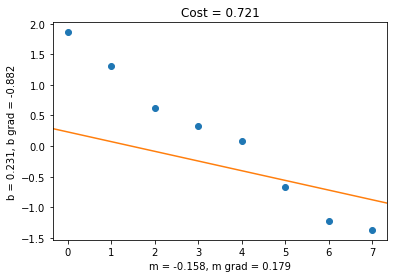

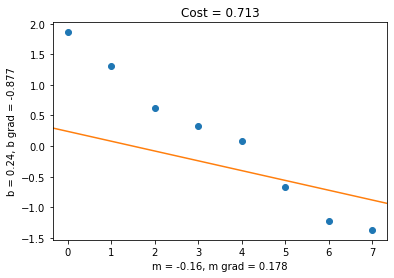

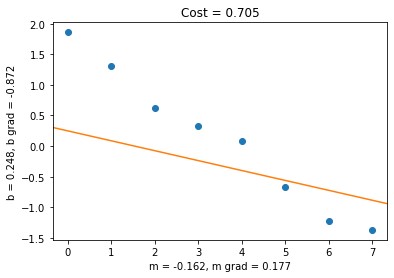

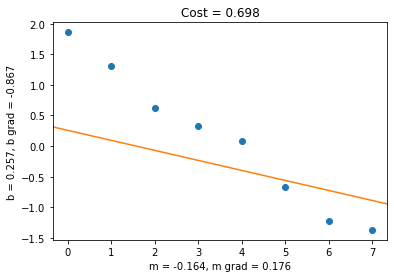

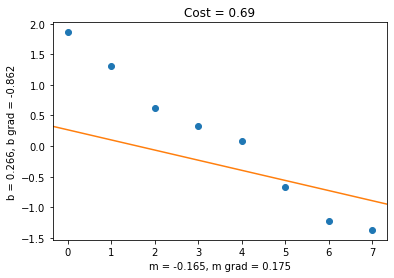

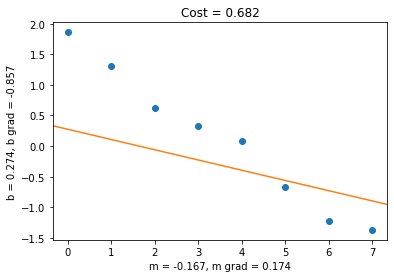

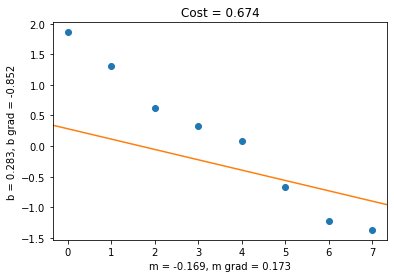

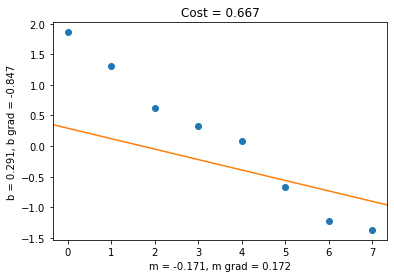

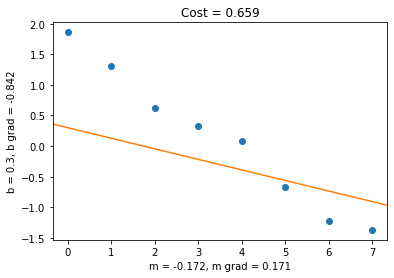

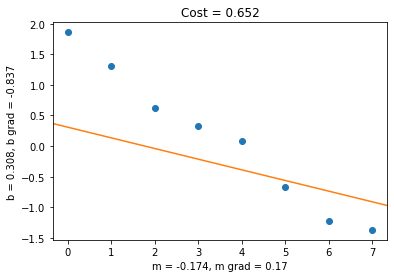

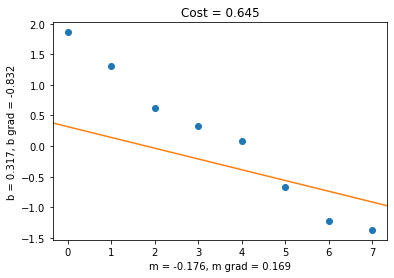

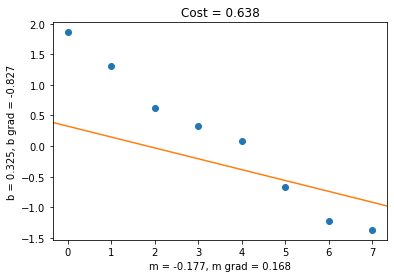

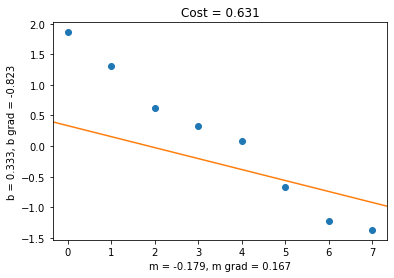

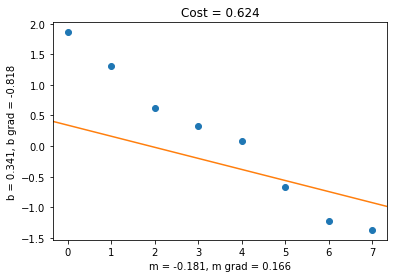

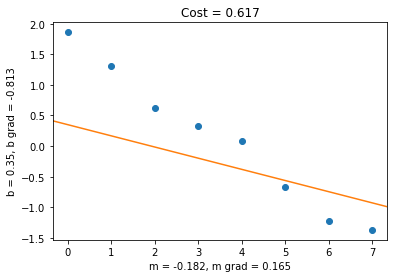

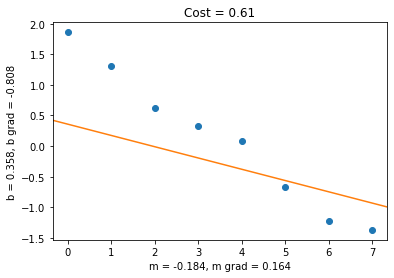

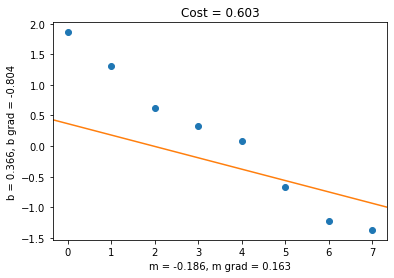

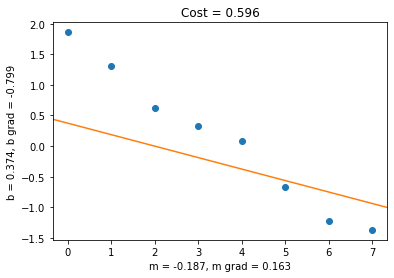

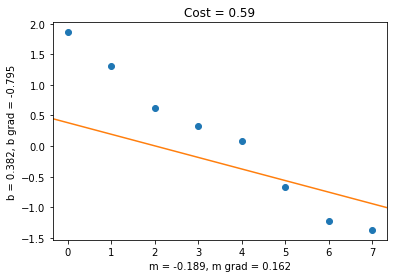

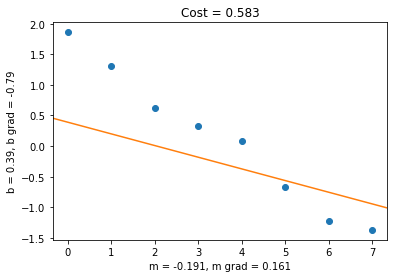

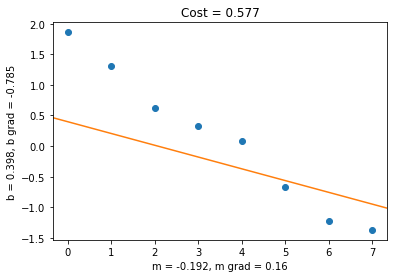

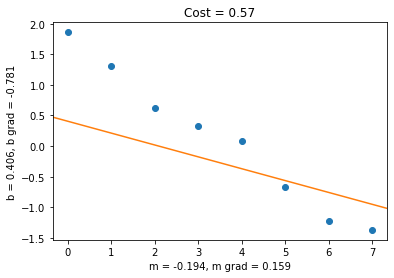

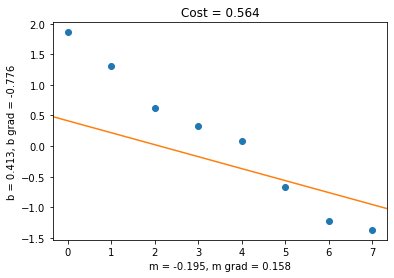

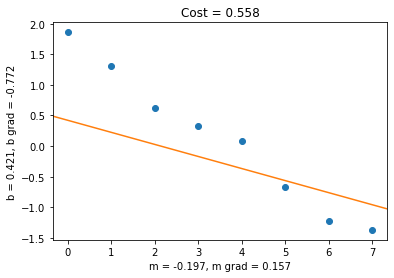

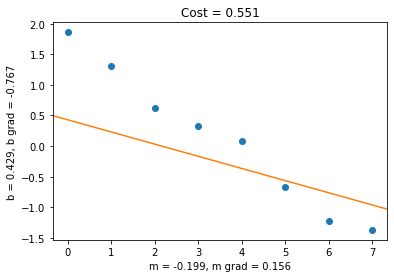

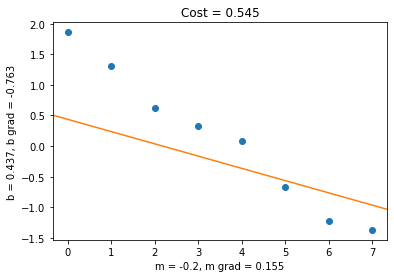

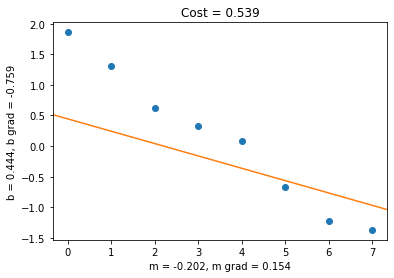

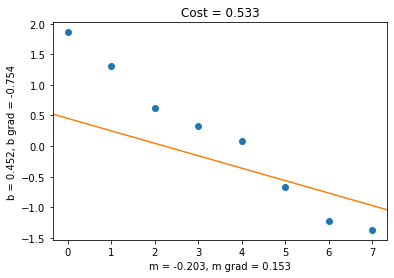

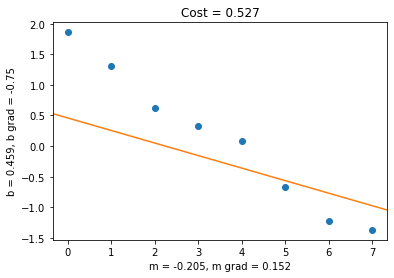

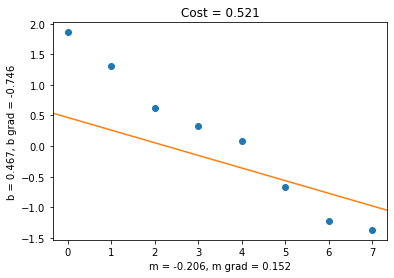

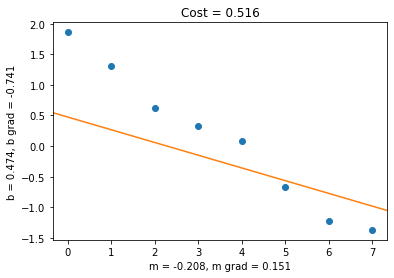

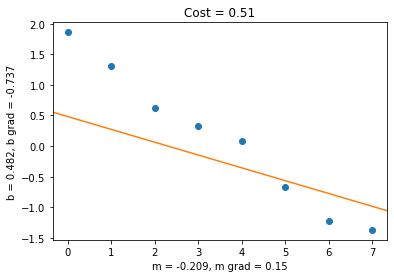

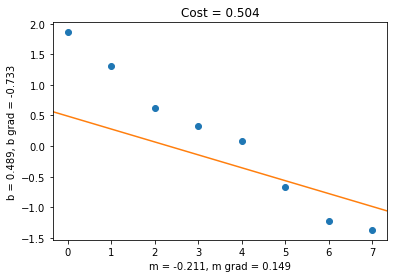

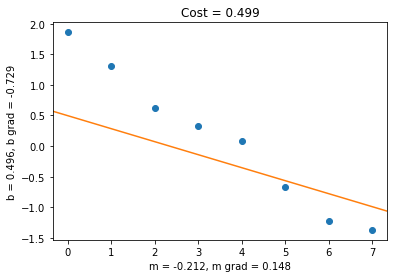

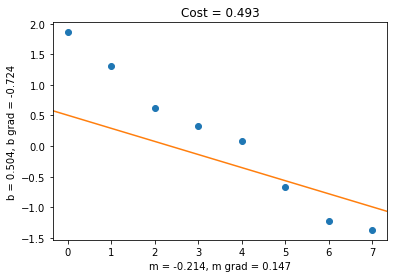

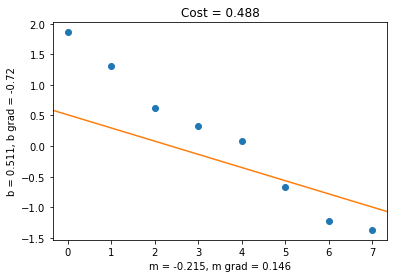

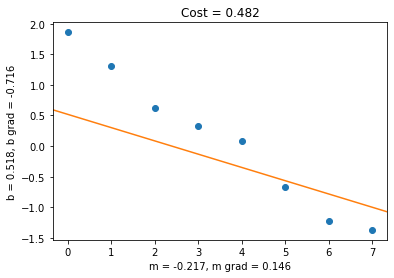

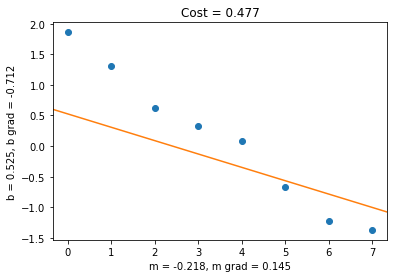

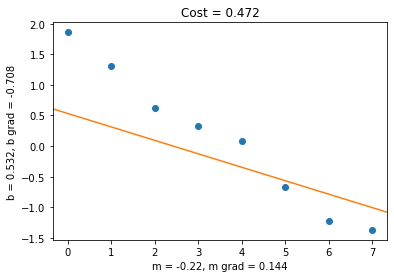

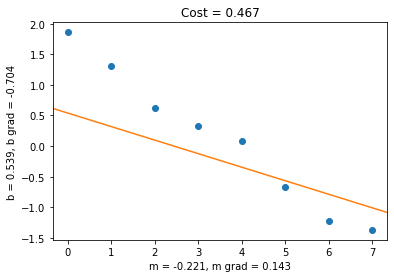

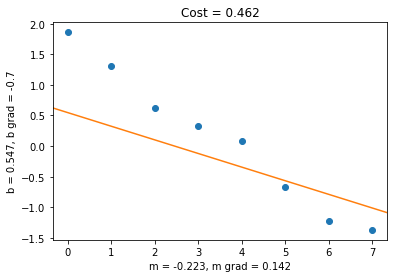

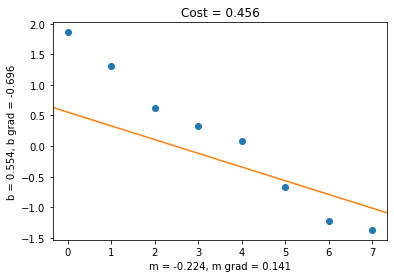

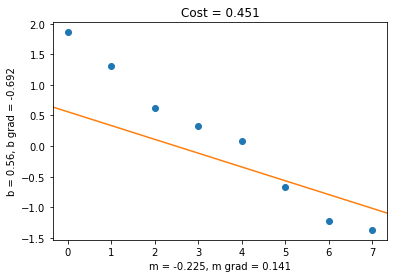

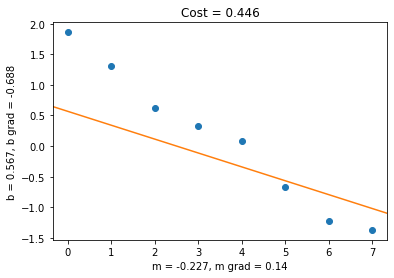

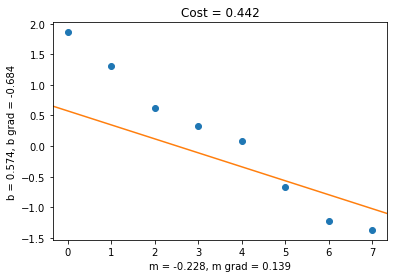

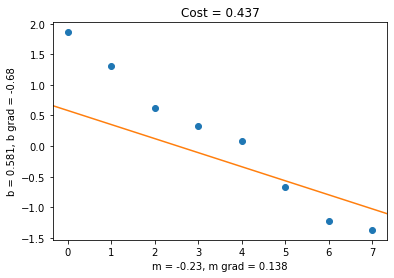

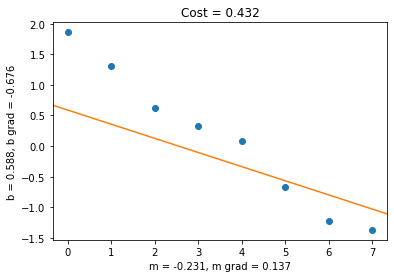

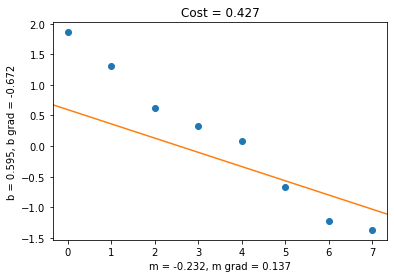

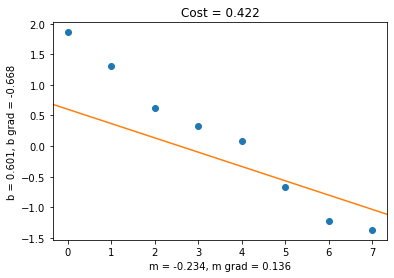

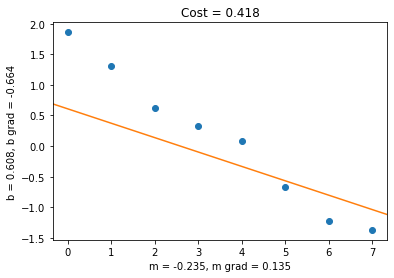

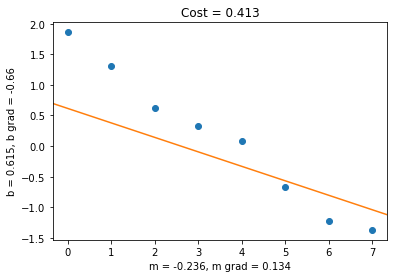

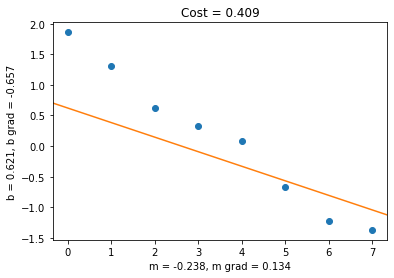

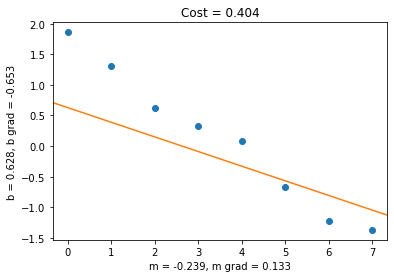

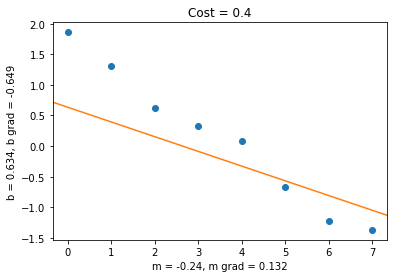

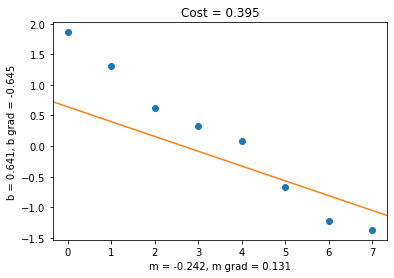

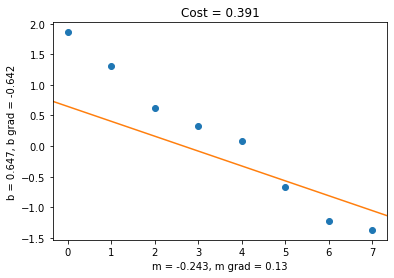

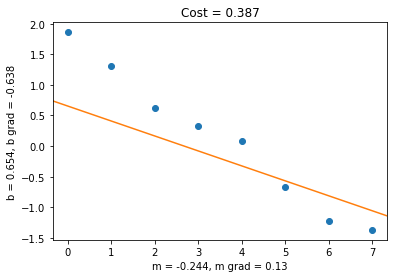

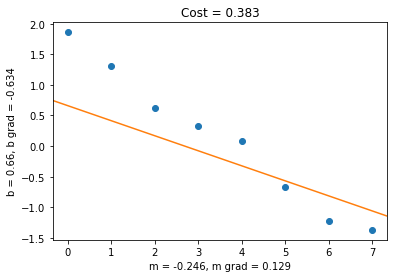

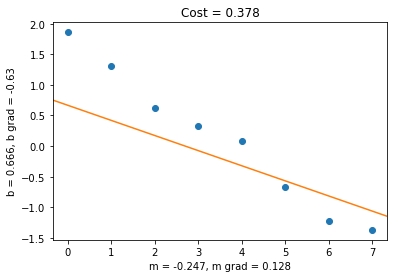

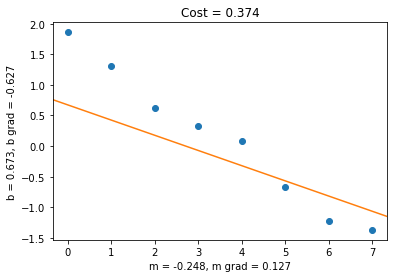

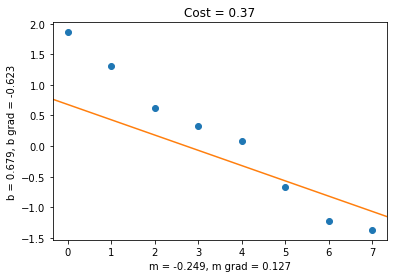

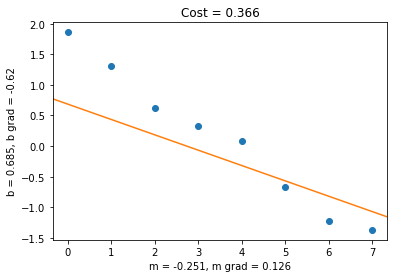

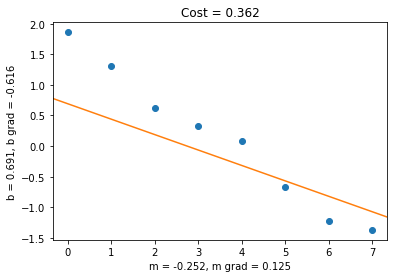

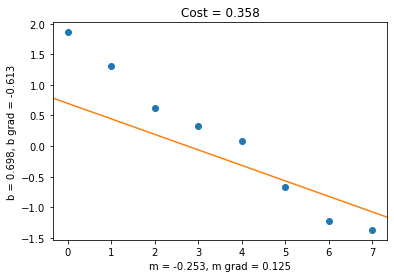

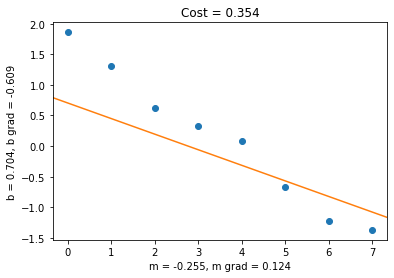

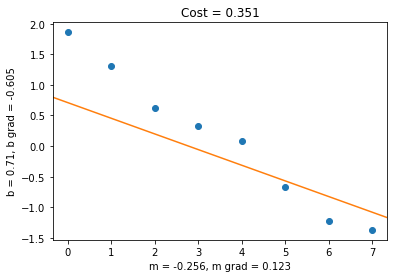

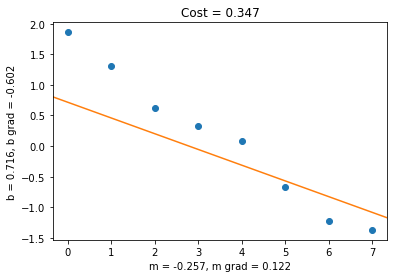

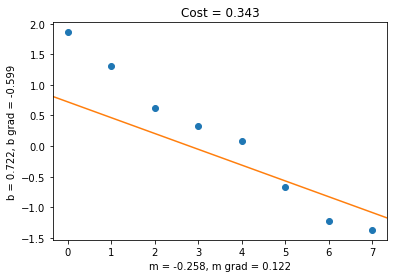

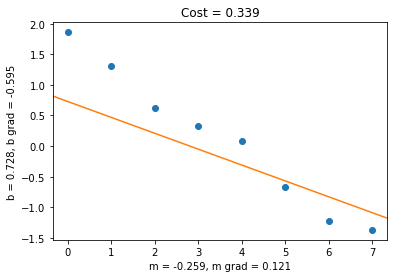

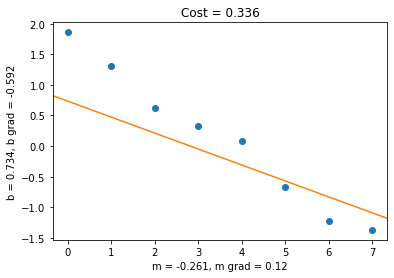

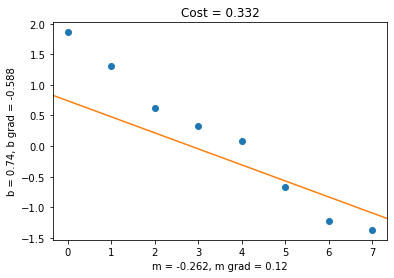

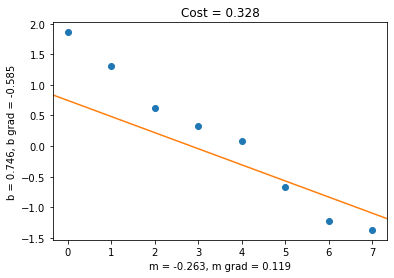

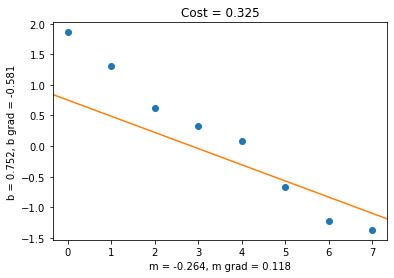

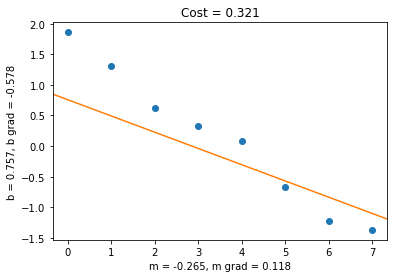

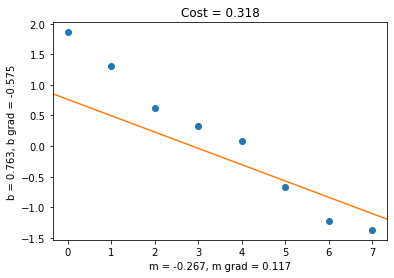

In [37]:
epochs = 100
for epoch in range(epochs): 
    
    optimizer.zero_grad() # Reset gradients to zero; else they accumulate
    
    yhats = regression(xs, m, b) # Step 1
    C = mse(yhats, ys) # Step 2
    
    C.backward() # Step 3
    
    labeled_regression_plot(xs, ys, m, b, C)
    
    optimizer.step() # Step 4

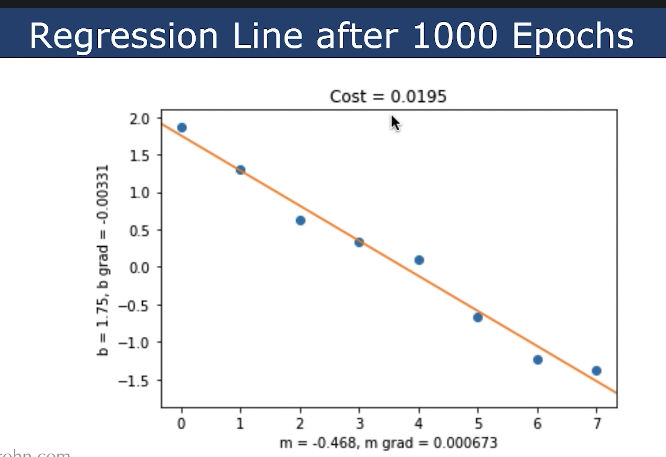

<font size = 4, color = red> Note the gradients are nearing zero -- which is what we need

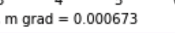

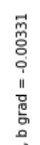

In later rounds of training, after the model's slope $m$ has become closer to the slope represented by the data, $\frac{\partial C}{\partial b}$ becomes negative, indicating an inverse relationship between $b$ and $C$. Meanwhile, $\frac{\partial C}{\partial m}$ remains positive. 

This combination directs gradient descent to simultaneously adjust the $y$-intercept $b$ upwards and the slope $m$ downwards in order to reduce cost $C$ and, ultimately, fit the regression line snugly to the data. 